# Algorithme génétique

### Présentation rapide
 
 Un algorithme génétique comprend une population (groupe) d'individus appelés chromosomes. Les chromosomes, chacun composé de gènes qui spécifient leurs traits, sont en compétition pour résoudre un problème. La capacité d'un chromosome à résoudre un problème est définie par une fonction de fitness.

L'algorithme génétique traverse les générations. À chaque génération, les chromosomes les plus adaptés sont plus susceptibles d'être sélectionnés pour se reproduire. Il y a aussi une probabilité à chaque génération que deux chromosomes voient leurs gènes fusionnés. C'est ce qu'on appelle le croisement. Et enfin, il y a la possibilité à chaque génération qu'un gène d'un chromosome puisse muter (changer au hasard).

Une fois que la fonction de fitness d'un individu de la population a franchi un seuil spécifié, ou que l'algorithme a traversé un nombre maximal de générations spécifié, le meilleur individu (celui qui a obtenu le score le plus élevé dans la fonction de fitness) est renvoyé.

Les algorithmes génétiques ne sont pas une bonne solution à tous les problèmes. Ils dépendent de trois opérations partiellement ou totalement stochastiques (déterminées aléatoirement) : sélection, croisement et mutation. Par conséquent, ils peuvent ne pas trouver une solution optimale dans un délai raisonnable. Pour la plupart des problèmes, des algorithmes plus déterministes existent avec de meilleures garanties. Mais il existe des problèmes pour lesquels aucun algorithme déterministe rapide n'existe. Dans ces cas, les algorithmes génétiques sont un bon choix.

### Implementation 


Nous utiliserons une implémentation générique de l'algorithme génétique (AG).
Commençons par les déclarations de types génériques et l'importation de modules.

In [1]:
from random import choices, choice, randint, randrange, shuffle, sample
from random import random as rnd
from typing import List, Optional, Callable, Tuple, Set
from copy import  deepcopy
from functools import partial, reduce
from statistics import mean, stdev


Genome = List[int] 
Chromosome = List[int] 
Population = List[Chromosome]
PopulateFunc = Callable[[], Population]
FitnessFunc = Callable[[Chromosome], int]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Chromosome, Chromosome]]
CrossoverFunc = Callable[[Chromosome, Chromosome], Tuple[Chromosome, Chromosome]]
MutationFunc = Callable[[Chromosome], Chromosome]
PrinterFunc = Callable[[Population, int, FitnessFunc], None]



#### 1) Écrivez une fonction qui génère aléatoirement un chromosome.
Remarque : utilisez les fonctions choices et choice du module random.
syntaxe pour  choices :
choices(population, weights=None, *, cum_weights=None, k=1)

complétez le code suivant :

In [9]:
#help(choices)
def generate_chromosome(genome: Genome, 
                        chromosome_length=None, 
                        use_shuffle=False) -> Chromosome:
    
    if use_shuffle :
        chromosome = genome.copy()
        shuffle(chromosome)
        return chromosome
    else:
        if  chromosome_length is None: 
            return choices(genome, k=len(genome))
        else:
            return choices(genome, k=chromosome_length)
            



Tester votre fonction

In [10]:
print(generate_chromosome([0,1], 10))
print(generate_chromosome([0,1, 3, 4] ))
print(generate_chromosome([0,1, 3, 4, 5, 6, 7, 8], use_shuffle=True ))

[1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
[4, 0, 4, 4]
[5, 3, 8, 7, 1, 4, 0, 6]


#### 2) Écrivez une fonction qui génère aléatoirement une population.
Remarque : quand il est possible, chaque chromosome de la population est unique . 
Utilisez la fonction generate_chromosome.

In [12]:
def generate_population(size: int, genome: Genome, 
                        chromosome_length=None, 
                        use_shuffle=False) -> Population: 
    population = [] 
    i=0
    while len(population) < size:
        chromosome = generate_chromosome(genome,chromosome_length,use_shuffle)
        if not chromosome in population or i==10:
            population.append(chromosome)
            i=0
        else:
            i=i+1
    return population
    

Test your code

In [13]:
print("without shuffle")
print(generate_population(4,   [0, 1, 2, 3, 4, 5], 6) )
print("with shuffle")
print(generate_population(4,   [0, 1, 2, 3, 4, 5], 6, True) )

without shuffle
[[2, 5, 2, 5, 4, 2], [1, 2, 3, 5, 3, 0], [2, 3, 2, 3, 0, 5], [3, 1, 1, 0, 4, 0]]
with shuffle
[[5, 1, 0, 4, 2, 3], [3, 2, 4, 5, 1, 0], [5, 1, 0, 3, 4, 2], [4, 0, 5, 1, 3, 2]]


#### 3) Écrivez une fonction qui simule un croisement à un seul point

Croisez (combinez) les chromosomes donnés pour créer des enfants qui représentent la population de la prochaine génération.
Remarque : utilisez les fonctions len() et randint(start, end).

In [14]:
def single_point_crossover(a: Chromosome, b: Chromosome) -> Tuple[Chromosome, Chromosome]:
    if not len(a)==len(b):
        raise ValueError("The given chromosones don't have the same length!")
    r = randint(1, len(a)-1) 
    x, y = a.copy(), b.copy()  
    x[r:],y[r:]= y[r:],x[r:]
    return x,y

In [15]:
single_point_crossover([2, 5, 2, 5, 4, 2],[1, 2, 3, 5, 3, 0])

([2, 5, 2, 5, 3, 0], [1, 2, 3, 5, 4, 2])

#### 4) Écrire une fonction qui simule le processus de mutation

Créez une copie du chromosome et utilisez la fonction randrange pour sélectionner au hasard l'index du gène à muter. le gène de remplacement est choisi au hasard dans le genome. la fonction rnd génére un nombre aléatoire entre 0 et 1.


In [81]:
def mutation(chromosome: Chromosome, genome: Genome, probability: float = 0.05) -> Chromosome:
    """Mutate, usually with a low probability, the given chromosome. 
     @param chromosome: chromosome to mutate
     @param probability: probability that a mutation attempt will be successful
    """
    chromosome  = chromosome.copy() 
    gen = genome.copy()
    for i in range(len(chromosome)):
        r = rnd() 
        if r < probability:
            gen.remove(chromosome[i])
            g = gen[randint(0,len(gen)-1)]
            gen.append(chromosome[i])
            chromosome[i]=g
        #i = randrange(0,len(chromosome))
        #j = randrange(0,len(genome))
        #chromosome[i]= genome[j]
        
    return chromosome
    



In [111]:
mutation([1, 1, 2, 3, 2, 0], [0, 1, 2, 3],  probability=0.1) 

[1, 1, 2, 3, 2, 0]

#### 5) Ecrire une fonction qui renvoie la somme des fitness de tous les individus d'une population
utiliser les fonctions de reduce et map

In [114]:
def population_fitness(population: Population, fitness_func: FitnessFunc) -> int:
    return reduce(lambda x,y: x+y, map(fitness_func,population))


In [139]:
p=generate_population(4,   [0, 1, 2, 3, 4, 5], 6)
print(population_fitness(p, lambda x : sum(x)))

61


#### 6) Écrivez une fonction qui sélectionne une paire d'individus à reproduire, avec une probabilité plus élevée de sélectionner ceux qui ont la meilleure forme physique.

Remarque : utilisez la fonction choices du module random.

syntax:  choices(population, weights=None, *, cum_weights=None, k=1)

In [136]:
def selection_pair(population: Population, fitness_func: FitnessFunc) -> Population:
    return choices(population, weights=list(map(fitness_func,population)),k=2)

In [142]:
print(p)
fitness_func = lambda x : sum(x)
selection_pair(p,fitness_func )

[[2, 0, 3, 0, 1, 4], [0, 4, 0, 0, 3, 1], [4, 5, 1, 4, 5, 3], [2, 4, 4, 4, 5, 2]]


[[4, 5, 1, 4, 5, 3], [2, 4, 4, 4, 5, 2]]

#### 7) Écrivez une fonction qui trie une population en utilisant la fonction de fitness donnée pour évaluer les individus.

Remarque : le paramètre maximiser indique l'ordre (croissant / décroissant)

utiliser la fonction sorted(iterable, /, *, key=None, reverse=False)

key spécifie une fonction à un argument utilisée pour extraire une clé de comparaison de chaque élément dans iterable 

(for example, key=str.lower).

In [148]:
#help(sorted)
def sort_population(population: Population, 
                    fitness_func: FitnessFunc, 
                    maximize: bool=False) -> Population:
    p = sorted(population, key= fitness_func,reverse = maximize)
    return p

In [149]:
print(p)
print(sort_population(p,fitness_func))

[[2, 0, 3, 0, 1, 4], [0, 4, 0, 0, 3, 1], [4, 5, 1, 4, 5, 3], [2, 4, 4, 4, 5, 2]]
[[0, 4, 0, 0, 3, 1], [2, 0, 3, 0, 1, 4], [2, 4, 4, 4, 5, 2], [4, 5, 1, 4, 5, 3]]


#### 8) Écrivez une fonction qui convertit un chromosome en chaîne.

par exemple le chromosome [6, 8, 5, 3, 7, 6, 1, 4] sera converti en 68537614

utilisez les fonctions join et map.

In [150]:
def chromosome_to_string(chromosome: Chromosome) -> str:
    return ''.join(map(str,chromosome))

In [151]:
print(chromosome_to_string([6, 8, 5, 3, 7, 6, 1, 4] ))

68537614


#### 8) Écrivez une fonction qui imprime les statistiques pour une population donnée.


In [154]:
def print_statistics(population: Population, 
                     generation_id: int, fitness_func: FitnessFunc):
    
    print("GENERATION %02d" % generation_id)
    print("=================")
    print("Population: [%s]" % ", ".join([chromosome_to_string(ch) 
                                          for ch in population]))
    
    
    fitness =  list(map(fitness_func,population))
    
    print("  Min %s" % min(fitness))
    print("  Max %s" % max(fitness))
    print("  Avg %s" % mean(fitness))
    print("  Std %s" % stdev(fitness))

     

In [155]:
print_statistics(p, 10, fitness_func)

GENERATION 10
Population: [203014, 040031, 451453, 244452]
  Min 8
  Max 22
  Avg 15.25
  Std 7.274384280931732


#### 8) Écrivez la fonction run_evolution qui implémente l'algorithme génétique.

Nous allons implémenter l'algorithme lui-même, le code qui va manipuler les chromosomes. Avant de le faire, cependant, revoyons la description d'un algorithme génétique et définissons les étapes qu'un algorithme génétique suit :

1. Créer une population initiale de chromosomes aléatoires pour la première génération de l'algorithme.

2. Mesurer la fitness de chaque chromosome dans cette génération de la population. Si l'un dépasse le seuil (fitness_limit), renvoyez-le et l'algorithme se termine.

3. Sélectionnez quelques individus à reproduire, avec une probabilité plus élevée de sélectionner ceux qui ont la meilleure fitness.

4. Croisez (combinez), avec une certaine probabilité, certains des chromosomes sélectionnés pour créer des enfants qui représentent la population de la prochaine génération.

5. Faire muter, généralement avec une faible probabilité, certains de ces chromosomes. La population de la nouvelle génération est maintenant complète, et elle remplace la population de la dernière génération.


6. Revenez à l'étape 2 sauf si le nombre maximal de générations (generation_limit) a été atteint. Si tel est le cas, renvoyez le meilleur chromosome trouvé jusqu'à présent.

In [ ]:
def run_evolution(populate_func: PopulateFunc, 
                  fitness_func: FitnessFunc, fitness_limit: int, maximize: bool = False,
                  selection_func: SelectionFunc = selection_pair,
                  crossover_func: CrossoverFunc = single_point_crossover,
                  mutation_func: MutationFunc = mutation, generation_limit: int = 100,
                  printer: Optional[PrinterFunc] = None) -> Tuple[Population, int]:  
    
    # generate a population initial
    population= population_func()
    # sort and assign the population 
    population = sort_population(population,fitness_func,maximize)
    best_fitness = fitness_func(population[0])
    # iterate until the generation_limit
     for i in range(generation_limit):

        # print the i^th generation if a printer is given
        if printer:
            printer()
        # we break if the fitness_limit is reached, >=fitness_limit when maximization and <=fitness_limit for minimizatio
        if (maximize and best_fitness >= fitness_limit) or (not maximize and best_fitness <= fitness_limit):
            break
        # initialize next_generation by the two first individuals in the sorted population
        next_generation= [population[0],population[1]]
        #while  |next_generation|  < |population.length|  
        while  len(next_generation)  < len(population)
            # select  a pair of parents  uning selection_func and fitness_func 
            a,b = selection_func()
            # call crossover_func to get offspring a, b from the parents
            x,y = crossover_func(a,b)
            # apply  mutation_func on each offspring 
            x=mutation_func(x)
            y=mutation_func(y)
            # increment the next generation  
            next_generation.append(x)
            next_generation.append(y)

        # population = next_generation
        population = next_generation[0,len(population)]
        population = sort_population(population,sort_func,)
        # sort and assign the population  
        
        
        
    # print_statistics
 
    return population, i

### Ignorez ce code utilitaire si vous ne le comprenez pas

L'instruction with est utilisée pour envelopper l'exécution d'un bloc avec des méthodes définies par un gestionnaire de contexte (voir la section With Statement Context Managers). Cela permet d'encapsuler les modèles d'utilisation communs try…except…finally pour une réutilisation pratique.

In [ ]:
from contextlib import contextmanager
import time 
@contextmanager
def timer():
    start = time.time()
    yield
    end = time.time()
    print(f"Elapsed Time: {(end - start)}s")
    
# example to understand the utility of the code below,

with timer():
    x = 0.5
    for i in range(1000000):
        x = x ** i
        

## N-Queens Problem

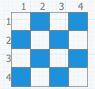


- `Vars` est un ensemble de *variables*.

  L'idée est que $V_i$ spécifie la colonne de la reine qui est placée dans la ligne $i$.
    
- `Values` est un ensemble de *valeurs* qui peuvent être assignées
  aux variables dans $\mathtt{Vars}$.
  
  Dans le problème des n-reines, nous aurons $\texttt{Valeurs} = \{1,\cdots,n\}$.
- `Constraints` est un ensemble de formules issues de la logique du premier ordre.
  Chacune de ces formules est appelée une *contrainte* de $\mathcal{P}$.
  Il existe deux types de contraintes différentes.
  * Nous avons des contraintes qui expriment que deux reines positionnées dans des rangées différentes ne partagent pas la même
    colonne. Pour capturer ces contraintes, nous définissons
    $$\texttt{DifferentCol} := \bigl\{ \texttt{V}_i \not= \texttt{V}_j \bigm| i \in \{1,\cdots,n\} \wedge j \in \{1,\cdots,n\} \wedge j < i \bigr\}.$$
    Ici la condition $j < i$ assure que, par exemple, alors que nous avons la contrainte
    $\texttt{V}_2 \not= \texttt{V}_1$ nous n'avons pas non plus la contrainte $\texttt{V}_1 \not= \texttt{V}_2$, car cette dernière
    contrainte serait redondante si l'ancienne contrainte avait déjà été établie.
  * Nous avons des contraintes qui expriment qu'aucune reine positionnée dans des rangées différentes ne partage la même
    diagonale. Les reines de la rangée $i$ et de la rangée $j$ partagent la même diagonale si l'équation
    $$ |i - j| = |V_i - V_j| $$
    tient. L'expression $|i-j|$ est la valeur absolue de la différence des rangs des reines en rang
    $i$ et la ligne $j$, tandis que l'expression $|V_i - V_j|$ est la valeur absolue de la différence des
    colonnes de ces reines. Pour capturer ces contraintes, nous définissons
    $$ \texttt{DifferentDiag} := \bigl\{ |i  - j| \not= |\texttt{V}_i - \texttt{V}_j| \bigm| i \in \{1,\cdots,n\} \wedge j \in \{1,\cdots,n\} \wedge j < i \bigr\}. $$

In [ ]:
#Constants, experiment parameters
NUM_QUEENS = 4
POPULATION_SIZE = 6
MUTATION_RATE = 0.5
GENERATION_LIMIT = 100
 

#### 9) Écrivez la fonction génome qui définit le génome à partir du problème des n-reines.
par exemple lorsque NUM_QUEENS=4, (1, 2, 3, 4) est le génome du problème des 4 reines.

In [ ]:
def genome_queens()-> Genome:
    raise ValueError("Not yet implemented!")

#### 10) Écrivez le code de la fonction de fitness du problème des n-reines

le score est le nombre total de conflits dans CSP

In [ ]:
def fitness_queens(chromosome: Chromosome)-> int:
    score = 0
    raise ValueError("Not yet implmented!") 
    
    #iterate over the rows using i as key
    
        # ci <- chromosome[i]
        
        #iterate over the rows using j as key
        
            # cj <- chromosome[j]
           
            # score++ if every pair of queens are attacking.
             
    return score     


     

 

In [ ]:
print(fitness_queens([1, 2, 3, 4]))
print(fitness_queens([2, 4, 1, 3]))

#### 10) Il est temps d'exécuter votre code.

RÉSOLUTION DU PROBLEME 4-QUEENS AVEC UN ALGORITHME GÉNÉTIQUE

In [ ]:
print("")
print("SOLVING 4-QUEENS WITH GENETIC ALGORITHM ")
print("----------")
NUM_QUEENS = 4
POPULATION_SIZE = 6
MUTATION_RATE = 0.5
GENERATION_LIMIT = 100

with timer():
    population, best_f, generations = run_evolution(
    populate_func=partial(generate_population,\
                          size=POPULATION_SIZE, genome=genome_queens()),\
        fitness_func=fitness_queens,\
        mutation_func=partial(mutation, genome=genome_queens(), probability=MUTATION_RATE),\
        fitness_limit=0, printer=print_statistics, generation_limit=GENERATION_LIMIT)
    
    print(population[0],  best_f, "generations", generations)
    print('\n')

#### 11)  8-QUEENS
RÉSOLUTION DU PROBLEME 8-QUEENS AVEC UN ALGORITHME GÉNÉTIQUE

In [ ]:
print("")
print("SOLVING 8-QUEENS WITH GENETIC ALGORITHM ")
print("----------")

NUM_QUEENS = 8
POPULATION_SIZE = 12 
GENERATION_LIMIT = 1000

with timer():
    population, best_f, generations = run_evolution(
    populate_func=partial(generate_population,\
                          size=POPULATION_SIZE, genome=genome_queens()),\
        fitness_func=fitness_queens,\
        mutation_func=partial(mutation, genome=genome_queens(), probability=MUTATION_RATE),\
        fitness_limit=0, printer=print_statistics, generation_limit=GENERATION_LIMIT)
    
    print(population[0],  best_f, "generations", generations)
    print('\n')